In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, RobustScaler


In [2]:
df = pd.read_csv('/home/iafnan/code/KhalylDammas/neo-hazardous-classification/raw_data/nearest-earth-objects(1910-2024).csv')
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [4]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


##  counts how many times each unique value ##

In [5]:
original_counts = df['is_hazardous'].value_counts()
print(original_counts)

is_hazardous
False    295037
True      43162
Name: count, dtype: int64


##  performing downsampling to balance a dataset  ##

In [6]:
df_majority = df[df['is_hazardous'] == False]
df_minority = df[df['is_hazardous'] == True]

n_minority = len(df_minority)
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=int(0.7 * (n_minority / 0.3)),  # 70% of the desired total size
                                   random_state=42)


df_processed = pd.concat([df_majority_downsampled, df_minority])
print(df_processed['is_hazardous'].value_counts(normalize=True) * 100)

is_hazardous
False    69.99993
True     30.00007
Name: proportion, dtype: float64


## Number of data after downsampling ##

In [7]:
df_processed['is_hazardous'].value_counts()

is_hazardous
False    100711
True      43162
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap of Nearest Earth Objects Dataset')

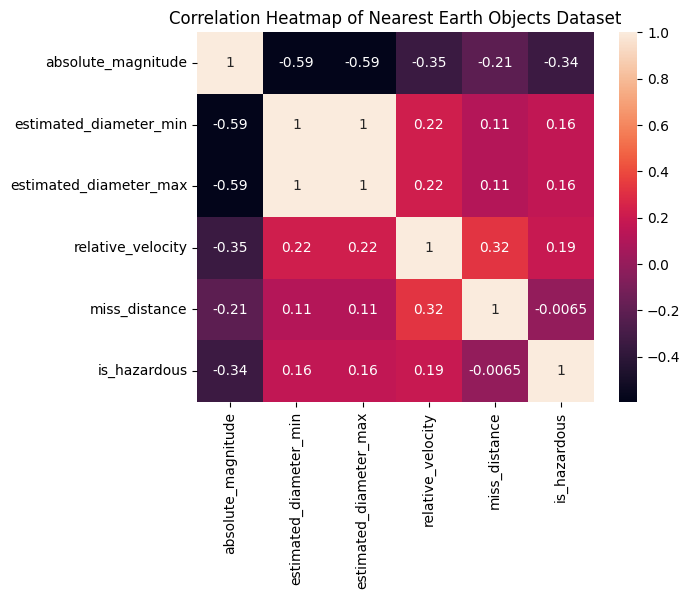

In [8]:
sns.heatmap(data=df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'is_hazardous']].corr(), annot=True)
plt.title('Correlation Heatmap of Nearest Earth Objects Dataset')

# Drop columns

In [9]:
df.drop(['neo_id','name','orbiting_body','estimated_diameter_min'], axis=1 , inplace = True )

In [10]:
# Columns after drop
df.head()

,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.883161,71745.401048,5.814362e+07,False
1,18.50,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.171412,56036.519484,6.311863e+07,False


# Check null value

In [11]:
df.isna().sum()

absolute_magnitude        28
estimated_diameter_max    28
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

# Remove rows with any null values

In [12]:
df.dropna(inplace=True)
df.isnull().sum()

absolute_magnitude        0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

# Check duplicated value

In [13]:
df.duplicated().sum()

np.int64(5)

# Count the occurrences of each value

In [14]:
df['is_hazardous'].value_counts()

is_hazardous
False    295009
True      43162
Name: count, dtype: int64

# Preparing the features and target variable

In [15]:
X = df.drop(['is_hazardous'], axis=1)
y = df['is_hazardous']

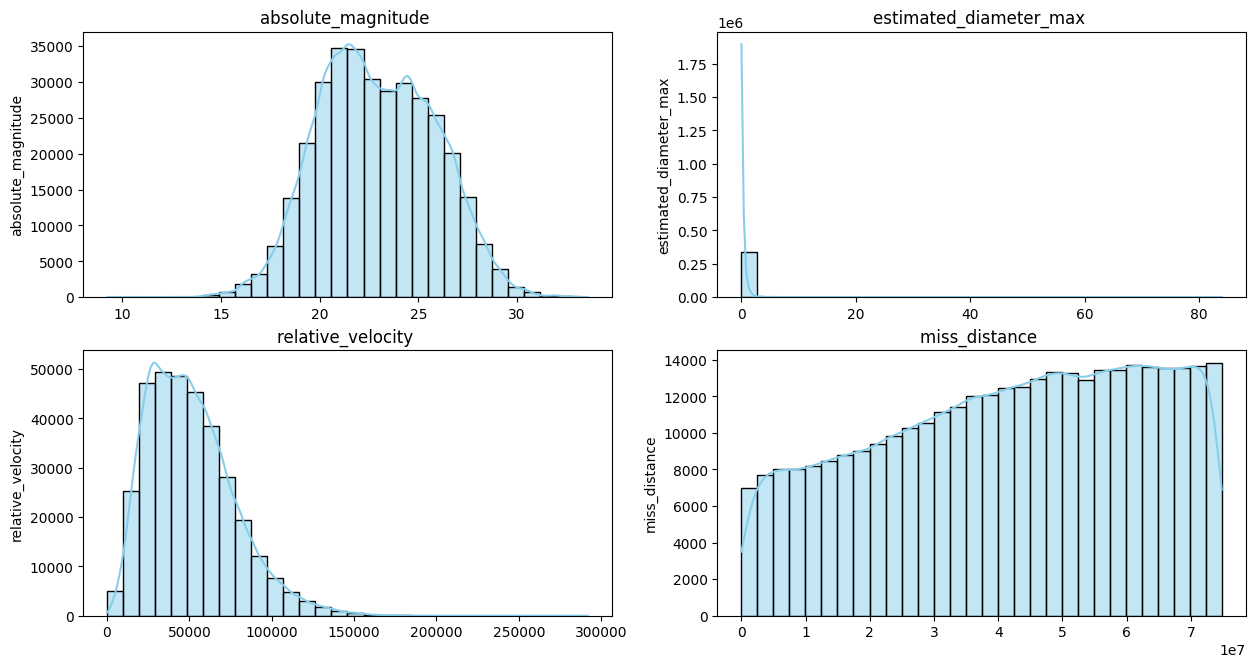

In [16]:
# Generates a grid of histograms for each numerical feature
plt.figure(figsize=(15, 20))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='skyblue')
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)

# Initialize MinMaxScaler

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
df = pd.DataFrame(X_scaled, columns=X.columns)
df.head()

,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance
0,0.406494,0.010506,0.245362,0.777315
1,0.380189,0.014112,0.376388,0.745994
2,0.501439,0.003617,0.084582,0.898495
3,0.467735,0.005283,0.269865,0.406323
4,0.552815,0.002028,0.191486,0.843833


# Number of Data before any outlier processing

In [18]:
df.shape

(338171, 4)

# Removes outliers from the DataFrame

In [19]:
columns = ['absolute_magnitude', 'estimated_diameter_max', 'relative_velocity']
outlier = []

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    outlier.extend(column_outliers)

outlier= list(set(outlier))
df.drop(index=outlier , inplace=True)

# Number of Data after any outlier processing

In [20]:
df.shape

(308218, 4)